$$
w_0 = \frac{\sum_{i=1}^{n} x_i^2 \sum_{i=1}^{n} y_i - \sum_{i=1}^{n} x_i \sum_{i=1}^{n} x_i y_i}{n \sum_{i=1}^{n} x_i^2 - \left( \sum_{i=1}^{n} x_i \right)^2} \tag{4a}
$$

$$
w_1 = \frac{n \sum_{i=1}^{n} x_i y_i - \sum_{i=1}^{n} x_i \sum_{i=1}^{n} y_i}{n \sum_{i=1}^{n} x_i^2 - \left( \sum_{i=1}^{n} x_i \right)^2} \tag{4b}
$$

In [4]:
# Exercise 11.1
# 根据公式 (4) 完成普通最小二乘法代数计算函数
# 公式(4)如上
def ols_algebra(x, y):
    """
    参数:
    x -- 自变量数组
    y -- 因变量数组

    返回:
    w1 -- 线性方程系数
    w0 -- 线性方程截距项
    """
    
    ### 代码开始 ### (≈ 3 行代码)
    n = len(x)
    w1 = (n*sum(x*y) - sum(x)*sum(y))/(n*sum(x*x) - sum(x)*sum(x))
    w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y))/(n*sum(x*x)-sum(x)*sum(x))
    ### 代码结束 ###
    
    return w1, w0

In [ ]:
# 测试数据
import numpy as np

x = np.array([55, 71, 68, 87, 101, 87, 75, 78, 93, 73])
y = np.array([91, 101, 87, 109, 129, 98, 95, 101, 104, 93])

w1, w0 = ols_algebra(x, y)
round(w1, 3), round(w0, 3)  # round函数用于设置精度

(np.float64(0.718), np.float64(44.256))

In [ ]:
# Exercise 11.2
# 根据公式 (3) 和公式 (5) 完成普通最小二乘法代数计算函数

$$
\frac{\partial f}{\partial w_0} = -2 \sum_{i=1}^{n} \left( y_i - (w_0 + w_1 x_i) \right) \tag{3a}
$$

$$
\frac{\partial f}{\partial w_1} = -2 \sum_{i=1}^{n} x_i \left( y_i - (w_0 + w_1 x_i) \right) \tag{3b}
$$

$$
w_0 = w_0 - lr * \frac{\partial f}{\partial w_0} \tag{5a}
$$

$$
w_1 = w_1 - lr * \frac{\partial f}{\partial w_1} \tag{5b}
$$

In [6]:
def ols_gradient_descent(x, y, lr, num_iter):
    """
    参数:
    x -- 自变量数组
    y -- 因变量数组
    lr -- 学习率
    num_iter -- 迭代次数

    返回:
    w1 -- 线性方程系数
    w0 -- 线性方程截距项
    """

    ### 代码开始 ### (> 5 行代码)

    w1 = 0  # 初始参数为 0
    w0 = 0  # 初始参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        # 计算近似值
        y_hat = (w1 * x) + w0
        # 计算参数对应梯度
        w1_gradient = -2 * sum(x * (y - y_hat))
        w0_gradient = -2 * sum(y - y_hat)
        # 根据梯度更新参数
        w1 -= lr * w1_gradient
        w0 -= lr * w0_gradient

    ### 代码结束 ###

    return w1, w0

w1_, w0_ = ols_gradient_descent(x, y, lr=0.00001, num_iter=100)
round(w1_, 3), round(w0_, 3)

(np.float64(1.264), np.float64(0.038))

Text(0.5, 1.0, 'Gradient descent')

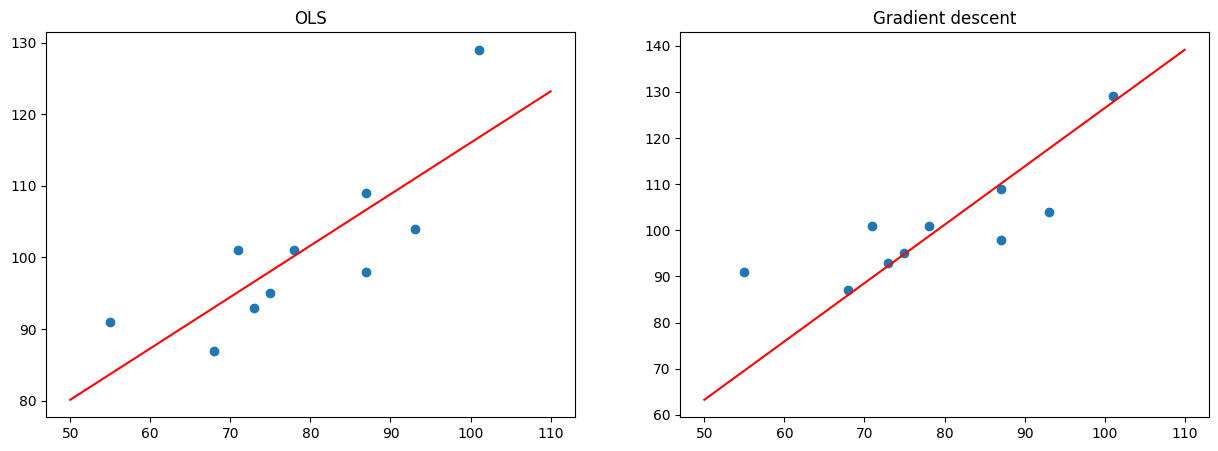

In [7]:
# 对比两种方法的拟合效果
from matplotlib import pyplot as plt

%matplotlib inline

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].scatter(x, y)
axes[0].plot(np.array([50, 110]), np.array([50, 110]) * w1 + w0, "r")
axes[0].set_title("OLS")
axes[1].scatter(x, y)
axes[1].plot(np.array([50, 110]), np.array([50, 110]) * w1_ + w0_, "r")
axes[1].set_title("Gradient descent")